# 房价预测

In [1]:
import pandas as pd

path = 'E:\Python\hourse price\housing.csv'
df = pd.read_csv(path)

In [60]:
# 查看数据前5项和属性
print(df.head())
df.info()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   houring_t  
0        5.0  
1        5.0  
2        5.0  
3       

In [3]:
# 查看缺失项
df.loc[df['total_bedrooms'].isnull(),:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [4]:
# 需要使用经纬度、居民数和平均收入，将total_rooms等转化成int,或者float，最后一个参数是分类，不需要转换
#df['longitude'] = df['longitude'].astype('float16') # 经度
#df['latitude'] = df['latitude'].astype('float16') # 维度
#df['population'] = df['population'].astype('float16').apply(lambda x: '%.i' % x).astype('int16')
#df['median_income'] = df['median_income'].astype('float16').apply(lambda x: '%.i' % x).astype('int16')
#df.info()

In [5]:
# 数值类的统计分类
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [6]:
# 对于分类数据，可以使用value_counts函数()
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

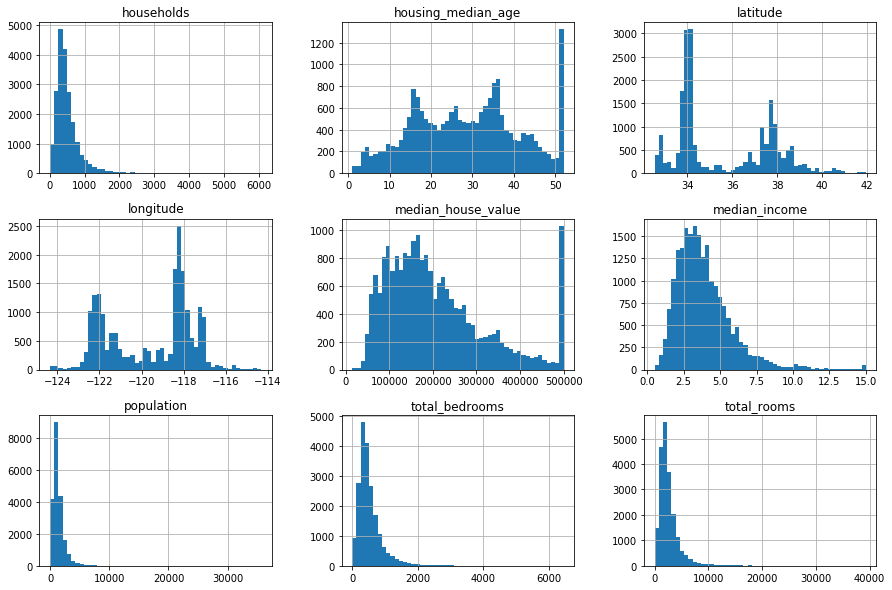

In [7]:
# 使用直方图观察每个属性，了解数据的分部情况
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(15,10))

plt.show()

In [13]:
# 划分训练集和测试集
"""
数据划分有随机抽样和分层抽样
"""
# 1 随机抽样
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


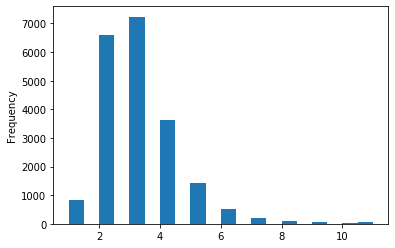

In [14]:
# 2 分层抽样
"""使用分层抽样需要结合实际的情景。"""
# 将数据离散化
import numpy as np
# 由于收入分布向左倾斜，其最大值为15，将原范围除以1.5缩小到10，再向上取整 

df['houring_t']=np.ceil(df['median_income']/1.5)
df['houring_t'].plot(kind='hist',bins=20)
plt.show()


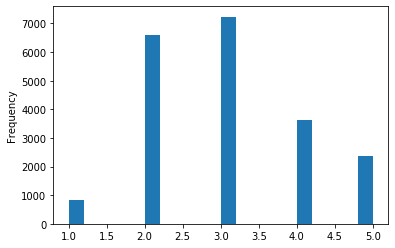

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: houring_t, dtype: float64

In [15]:
# 将所有大于5的用5替换，小于5的保持不变
df['houring_t'].where(df['houring_t']<5,5.0,inplace=True)
df['houring_t'].plot(kind='hist',bins=20)
plt.show()
# 将分类好的除以总数：每个类别的概率
df['houring_t'].value_counts()/len(df)


In [16]:
# 分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
"""
参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，默认为10

参数test_size和train_size是用来设置train/test对中train和test所占的比例。例如： 
1.提供10个数据num进行训练和测试集划分 
2.设置train_size=0.8 test_size=0.2 
3.train_num=num*train_size=8 test_num=num*test_size=2 
4.即10个数据，进行划分以后8个是训练数据，2个是测试数据

注*：train_num≥2，test_num≥2 ;test_size+train_size可以小于1*

参数 random_state控制是将样本随机打乱
"""
# 因为在预测房价中位数，收入中位数是很强的属性。所以确保在收入属性上，测试集能够代表整个数据集中各种不同类型的收入
for train_index, test_index in split.split(df,df['houring_t']):
    # 通过分层划分好测试和训练比例(StratifiedShuffleSplit)，再使用split函数划分测试集和训练集的索引
    print('train:',train_index,'test:',test_index) # 训练集索引和测试集索引
    start_train_set = df.loc[train_index,] # 划分后的训练集
    start_test_set = df.loc[test_index,] # 划分后的测试集

# 查看新的测试集与原始数据分类的比例是否一致。
start_test_set['houring_t'].value_counts()/len(start_test_set) 

train: [17606 18632 14650 ... 13908 11159 15775] test: [ 5241 10970 20351 ...  4019 12107  2398]


3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: houring_t, dtype: float64

In [ ]:
# 删除houring_t
# start_test_set.drop(labels=['houring_t'],axis=1)


In [17]:
# 数据探索和可视化
import copy
housing = start_train_set.copy() # 创建副本


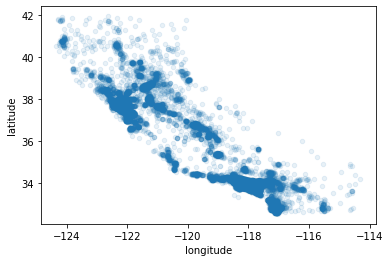

In [18]:
# 1.探索不同的经纬度区域的数量
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
plt.show()

<Figure size 720x720 with 0 Axes>

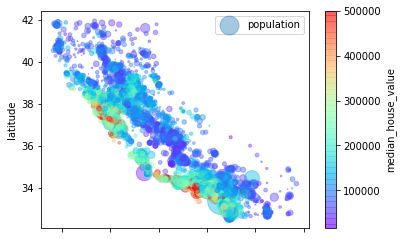

In [19]:
# 2.探索房价与人口和地理位置的关系规律
"""
scatter(self, x, y, s=None, c=None, **kwargs)
 |      Create a scatter plot with varying marker point size and color.
 |      
 |      The coordinates of each point are defined by two dataframe columns and
 |      filled circles are used to represent each point. This kind of plot is
 |      useful to see complex correlations between two variables. Points could
 |      be for instance natural 2D coordinates like longitude and latitude in
 |      a map or, in general, any pair of metrics that can be plotted against
 |      each other.
 |      
 |      Parameters
 |      ----------
 |      x : int or str
 |          The column name or column position to be used as horizontal
 |          coordinates for each point.
 |      y : int or str
 |          The column name or column position to be used as vertical
 |          coordinates for each point.
 |      s : scalar or array_like, optional
 |          The size of each point. Possible values are:
 |      
 |          - A single scalar so all points have the same size.
 |      
 |          - A sequence of scalars, which will be used for each point's size
 |            recursively. For instance, when passing [2,14] all points size
 |            will be either 2 or 14, alternatively.
 |      
 |      c : str, int or array_like, optional
 |          The color of each point. Possible values are:
 |      
 |          - A single color string referred to by name, RGB or RGBA code,
 |            for instance 'red' or '#a98d19'.
 |      
 |          - A sequence of color strings referred to by name, RGB or RGBA
 |            code, which will be used for each point's color recursively. For
 |            instance ['green','yellow'] all points will be filled in green or
 |            yellow, alternatively.
 |      
 |          - A column name or position whose values will be used to color the
 |            marker points according to a colormap.
 |      
 |      **kwargs
 |          Keyword arguments to pass on to :meth:`DataFrame.plot`.
 |      
 |      Returns
"""
#housing['median_house_value'].astype(float)
plt.figure(figsize=(10,10))
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/50,label='population',
             c='median_house_value',cmap='rainbow',colorbar=True)
"""
s=houring['population']/100 :除100的原因是原始数据太大，不好观测
c=houring['median_house_value'].astype(float).tolist() : 我使用原代码显示错误，传入给c的参数是一个str, int or array_like，因为
要显示是人口与钱的关系，我就把houring['median_house_value']转换成了列表。可能的原因是我开始写入的是object类型，但我只转换了几列数%xdel的类型，
没有转换median_house_value，所以我又将median_house_value的类型该改成float,就可以使用houring里面的columns来代替c。
"""             
plt.legend()
plt.show()
# 圆点越大代表人口越多，颜色越深代表房价越贵，可以看到沿海地区的房价较高

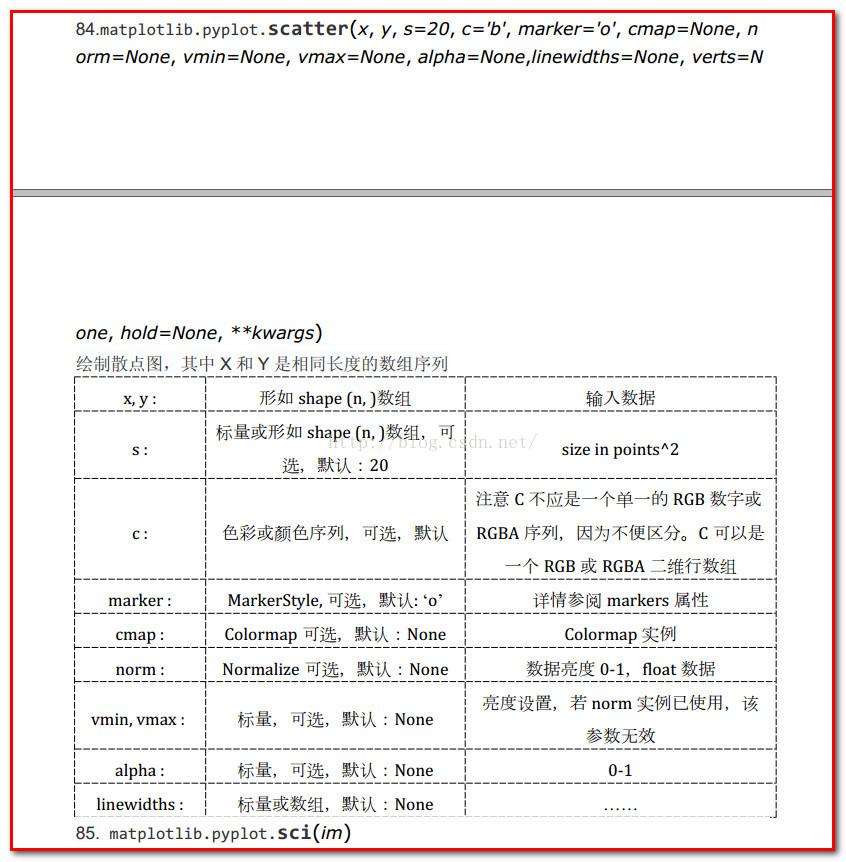

In [20]:
# 3.探究不同属性与房价中位数的相关性
# 相关系数
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
houring_t             0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

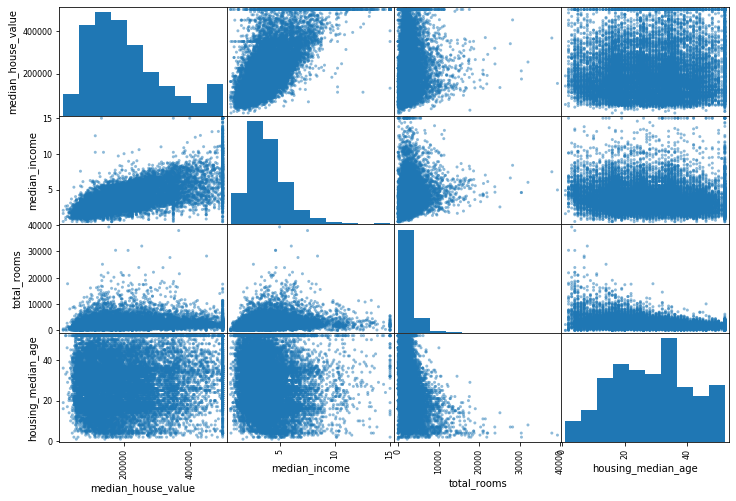

In [21]:
# 分布矩阵
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age'] # 选出与median_house_value正相关的index
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()
# 从图上可以发现median_income与median_house_value相关性最强

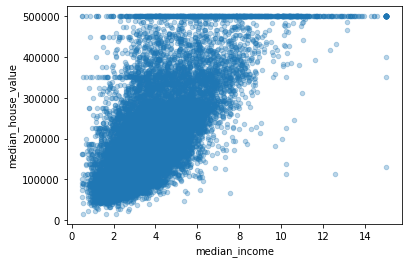

In [22]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.3)
# 从图中可以发现二者的相关性，但也有异常值，例如50W,46W和35W附近的直线，后续可能需要对其进行删除

In [23]:
# 4.试验不同属性的组合
"""
这一步我们可以从实际出发，通过现有的特征进行一些相互组合，衍生出新的特征。例如：

每个家庭的房间数=总房间数(totals_rooms)/总家庭数(housholds)

每个房间的卧室数=总的卧室数(total_bedrooms)/总的房间数(total_rooms)

每个家庭的人口数=总的人口数(population)/总的家庭数(housholds)
"""
housing['room_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,houring_t,room_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0,5.505618,0.193878,3.808989


In [24]:
# 验证新构造的三个特征值与目标值之间的相关性系数
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# 可以看到bedroom_per_room与median_house_value的相关性是负的

median_house_value          1.000000
median_income               0.687160
houring_t                   0.642274
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
housing_drop = housing.drop('median_house_value',axis=1) 
housing_labels = housing['median_house_value'].copy() # 训练集中的'median_house_value'

2.1 数据清理
缺失值的处理

前面我们提到total_bedrooms属性有缺失。我们可以以下方法来处理：

Scikit-Learn中提供了Imputer类来处理缺失值。使用中位数填充缺失值：

删除缺失的行，可以使用pandas中的dropna()方法

删除该列，可以使用pandas中的drop()方法

用平均值或中位数填充该值，可以使用pandas中的fillna()方法

Scikit-Learn中提供了Imputer类来处理缺失值。使用中位数填充缺失值的代码如下：

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # 使用中位数来填充缺失值，默认是均值

In [27]:
# 由于中位数只能针对数值型，我们需要先创建一个只有数值型属性的数据副本
housing_temp1 = housing.drop('ocean_proximity',axis=1) # 将删除object类型的dataframe赋值给housing_temp
imputer.fit(housing_temp1) # 按列计算各列的中位数
X = imputer.transform(housing_temp1) # 各列的缺失值使用中位数进行填充，结果是一个numpy类型
housing_temp = pd.DataFrame(X, columns=housing_temp1.columns) # 将上部的数值转换为dataframe
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,houring_t,room_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0,5.505618,0.193878,3.808989


In [28]:
# 2.1.1 使用LabelEncoder
from sklearn.preprocessing import LabelEncoder # 导入标签解码模块
encoder = LabelEncoder() 
housing_text = housing['ocean_proximity'] # 待处理的文本数据
housing_text_encoded = encoder.fit_transform(housing_text) # 使用fit_tranform函数来处理
encoder.classes_ # 原始分类数据
housing_text_encoded # 将原始数据依次转换成0，1，2，3，4。结果是numpy类型

array([0, 0, 4, ..., 1, 0, 3])

In [29]:
# 2.1.2 使用OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_text_OneHotEncoder = encoder.fit_transform(housing_text.values.reshape(-1,1))
# housing_text.values.reshape(-1,1) : 将(1,n)的array转化为(n,1)的array
housing_text_OneHotEncoder.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler() # 标准差缩放
mm_scaler = MinMaxScaler() # 最大最小缩放

In [31]:
housing_temp_std = std_scaler.fit_transform(housing_temp) # 通过标准差缩放的数据
pd.DataFrame(housing_temp_std,columns=housing_temp.columns) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,houring_t,room_per_household,bedrooms_per_room,population_per_household
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,0.688068,-0.954456,-0.312055,0.193805,-0.086499
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,1.154794,1.890305,0.217683,-0.940745,-0.033534
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.087217,-0.954456,-0.465315,0.499160,-0.092405
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-1.388864,-0.954456,-0.079661,-0.208675,0.089736
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,0.410625,-0.006202,-0.357834,0.324937,-0.004194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.287029,0.942051,0.234352,-0.474576,-0.031755
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.812371,-0.954456,-0.308114,0.578453,0.084689
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,-0.943746,-0.006202,0.346934,-0.580895,-0.030554
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.163433,-0.006202,0.024995,-0.331047,0.061509


In [32]:
housing_temp_minmax = mm_scaler.fit_transform(housing_temp) # 通过最大最小缩放得到的数据
housing_temp_minmax

array([[0.24501992, 0.50478215, 0.7254902 , ..., 0.02482574, 0.13761338,
        0.00112831],
       [0.24103586, 0.47927736, 0.25490196, ..., 0.03465309, 0.06561937,
        0.00162207],
       [0.71215139, 0.02444208, 0.58823529, ..., 0.02198255, 0.15698998,
        0.00107325],
       ...,
       [0.79183267, 0.16471838, 0.15686275, ..., 0.03705086, 0.08845406,
        0.00164985],
       [0.6314741 , 0.1360255 , 0.58823529, ..., 0.03107846, 0.10430839,
        0.00250811],
       [0.18924303, 0.55579171, 1.        , ..., 0.02637524, 0.13372824,
        0.00104101]])

In [33]:
# 编码分类变量
"""使用LabelBinarizer类可以一次性完成两个转化(从文本类别转化为整数类别，再从整数类别转化为Onehot向量)"""
from sklearn.preprocessing import LabelBinarizer
"""
LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False
Parameters
----------

neg_label : int (default: 0)
    Value with which negative labels must be encoded.

pos_label : int (default: 1)
    Value with which positive labels must be encoded.

sparse_output : boolean (default: False)
    True if the returned array from transform is desired to be in sparse
    CSR format.
sparse_output = True :可以将向量转化为稀疏矩阵
Attributes
"""
encoder = LabelBinarizer()
housing_text_label = encoder.fit_transform(housing_text)
housing_text_label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
# 将数值变量和分类变量组合起来
houring_train = np.concatenate((housing_temp_minmax,housing_text_label),axis=1)
houring_train

In [ ]:
housing_temp_minmax.shape,housing_text_label.shape,houring_train.shape

In [44]:
"""
自定义转换器
虽然Scikit-Learn已经提供了许多有用的转换器，但是你仍然需要
为一些诸如自定义清理操作或是组合特定属性等任务编写自己的转换
器。你当然希望让自己的转换器与Scikit-Learn自身的功能（比如流水
线）无缝衔接，而由于Scikit-Learn依赖于鸭子类型（duck typing）的
编译，而不是继承，所以你所需要的只是创建一个类，然后应用以下
三个方法：fit（）（返回自身）、transform（）、fit_transform（）。
如果添加TransformerMixin作为基类，就可以直接得到最后一个方
法。同时，如果添加BaseEstimator作为基类（并在构造函数中避免
*args和**kargs），你还能额外获得两个非常有用的自动调整超参数
的方法（get_params（）和set_params（））
"""
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # np.c_拼接
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room] 
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_ex = attr_adder.fit_transform(housing.values)
pd.DataFrame(housing_ex)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-121.89,37.29,38,1568,351,710,339,2.7042,286600,<1H OCEAN,2,4.62537,0.223852,2.0944,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,340600,<1H OCEAN,5,6.00885,0.159057,2.70796,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,196900,NEAR OCEAN,2,4.22511,0.241291,2.02597,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,46300,INLAND,2,5.23229,0.200866,4.13598,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,254500,<1H OCEAN,3,4.50581,0.231341,3.04785,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,240200,INLAND,4,6.05238,0.185681,2.72857,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,113000,INLAND,2,4.63566,0.245819,4.07752,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,97800,INLAND,3,6.34641,0.179609,2.74248,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,225900,<1H OCEAN,3,5.50562,0.193878,3.80899,5.50562,3.80899


In [59]:
# 将DataFrame格式转化为Numpy数组
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
DFT = DataFrameSelector(attribute_names=housing.columns)
ddd = DFT.transform(housing)
aaa = DFT.fit_transform(housing)
aaa

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422,
        0.22385204081632654, 2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124,
        0.15905743740795286, 2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 0.24129098360655737,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 0.1796086508753862,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 0.19387755102040816,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295,
        0.22035541195476574, 1.9859154929577465]], dtype=object)

In [54]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'houring_t',
       'room_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')